#**Understanding the Data**

In [228]:
# --- Importing Relevant Libraries ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [229]:
# --- Initialising Data ---

my_data = pd.read_csv("loan.csv")

In [230]:
# --- Understanding Data Set Size that we're Dealing With ---

my_data.shape

(39717, 111)

In [231]:
# --- Understanding Data Columns ---

my_data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


###It is observed in the above output that there are a few **null values in some columns**. We **need to figure out if** there's a **large amount** of NULL values & remove it.

#**Removing Unnecessary Data**

In [232]:
# --- Calculating No. of NULL Values ---

my_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

###In the below code, dropna() function is used to remove rows ("axis=0") and columns ("axis=1") from a dataset. The "how=all" argument means that drop rows or columns if all values are missing/NA.

In [233]:
# --- Dropping Columns with NA Values ---

my_data.dropna(axis = 1, how = 'all', inplace = True)
my_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [234]:
# --- Dropping Columns which won't Add any Value to Our Analysis---

my_data.drop(["member_id", "funded_amnt", "funded_amnt_inv", "emp_title", "pymnt_plan", "next_pymnt_d", "mths_since_last_delinq", "acc_now_delinq", "mths_since_last_record", "url", "desc", "title", "zip_code", "delinq_2yrs", "revol_bal", "revol_util", "initial_list_status", "out_prncp_inv", "total_pymnt_inv", "recoveries", "collection_recovery_fee"], axis = 1, inplace = True)

###As a standard, if there are more than 40-50% missing values in a column, that column should be imputed.

###Therefore, **columns with missing values**, and those **columns which won't add much value** to our analysis (like member_id, emp_title, etc.) have been imputed till now.

In [235]:
my_data.head()

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0.0,0,0.0,0.0
1,1077430,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0,0,0.0,0.0
2,1077175,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0.0,0,0.0,0.0
3,1076863,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0.0,0,0.0,0.0
4,1075358,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0.0,0,0.0,0.0


###As per the problem statement, we need to find insights for defaulted records and, therefore, records with "Current" value in loan_status can be removed.

In [236]:
# --- Removing records with loan_status as "Current" ---

my_data = my_data[my_data.loan_status != "Current"]
my_data.loan_status.unique()

my_data = my_data[my_data.loan_status != "Fully Paid"]
my_data.loan_status.unique()

array(['Charged Off'], dtype=object)

#**Handling Missing Values**

In [237]:
# --- Determining the % of missing values ---

(my_data.isna().sum()/len(my_data.index))*100

id                            0.000000
loan_amnt                     0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_length                    4.051893
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
purpose                       0.000000
addr_state                    0.000000
dti                           0.000000
earliest_cr_line              0.000000
inq_last_6mths                0.000000
open_acc                      0.000000
pub_rec                       0.000000
total_acc                     0.000000
out_prncp                     0.000000
total_pymnt                   0.000000
total_rec_prncp               0.000000
total_rec_int                 0.000000
total_rec_late_fee       

###Since employment length has the ***most missing values*** as compared to other columns, we will assign the average value to missing records. Other columns have a negligible amount of missing values and, therefore, can remain as-is.

In [238]:
# --- Calculating Average ---
# (using modal avg. since we should avoid using Mean as a good practise and calculating Median isn't possible in this scenario)

print(my_data.emp_length.mode()[0])
my_data.emp_length.value_counts()

10+ years


10+ years    1331
< 1 year      639
2 years       567
3 years       555
4 years       462
5 years       458
1 year        456
6 years       307
7 years       263
8 years       203
9 years       158
Name: emp_length, dtype: int64

In [239]:
# --- Mode= "10+ Years". Therefore, assigning mode to missing records ---

my_data.emp_length.fillna(my_data.emp_length.mode()[0], inplace = True)
print("Below is the % missing values in emp_lenght column:")
my_data.emp_length.isna().sum()

Below is the % missing values in emp_lenght column:


0

#**Standardizing Data**

###Since int_rate has %, we need to convert it to a numerical data type. Similarly, we need to convert emp_length to numeric by removing "+" and "<" symbols.

In [240]:
# --- Converting interest rate and employment length to numeric data type ---

my_data.int_rate = pd.to_numeric(my_data.int_rate.apply(lambda x : x.split('%')[0]))
my_data.emp_length = pd.to_numeric(my_data.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [241]:
annual_inc_outl = my_data['annual_inc'].quantile(0.95)
loan_data = my_data[my_data.annual_inc <= annual_inc_outl]

In [242]:
my_data.head()

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
1,1077430,2500,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0,0,0.0,0.0
8,1071795,5600,60 months,21.28,152.39,F,F2,4,OWN,40000.0,...,Apr-12,152.39,Aug-12,0.0,1,INDIVIDUAL,0.0,0,0.0,0.0
9,1071570,5375,60 months,12.69,121.45,B,B5,0,RENT,15000.0,...,Nov-12,121.45,Mar-13,0.0,1,INDIVIDUAL,0.0,0,0.0,0.0
12,1064687,9000,36 months,13.49,305.38,C,C1,0,RENT,30000.0,...,Jul-12,305.38,Nov-12,0.0,1,INDIVIDUAL,0.0,0,0.0,0.0
14,1069057,10000,36 months,10.65,325.74,B,B2,3,RENT,100000.0,...,Oct-13,325.74,Mar-14,0.0,1,INDIVIDUAL,0.0,0,0.0,0.0


In [243]:
# --- Grouping Data in Classes for Cleaner Analysis---

my_data['annual_inc_new'] = pd.cut(my_data['annual_inc'], bins=15,precision =0,labels =['5-15', '15-25', '25-35', '35-45', '45-55', '55-65', '65-75', '75-85', '85-95', '95-105', '105-115', '115-125', '125-135', '135-145', '145-155'])
my_data['int_rate_new'] = pd.cut(my_data['int_rate'], bins=7,precision =0,labels=["4%-7%","7%-10%","10%-13%","13%-16%","16%-19%", "19%-22%", "22%-25%"])

#**Univariate Analysis**

###**Purpose Column**: Analyzing this gives us a valuable insight into the data which we can keep in the back of our mind during bivariate analysis. This will help us to draw meaningful conclusions later in the analysis.

<Axes: xlabel='count', ylabel='purpose'>

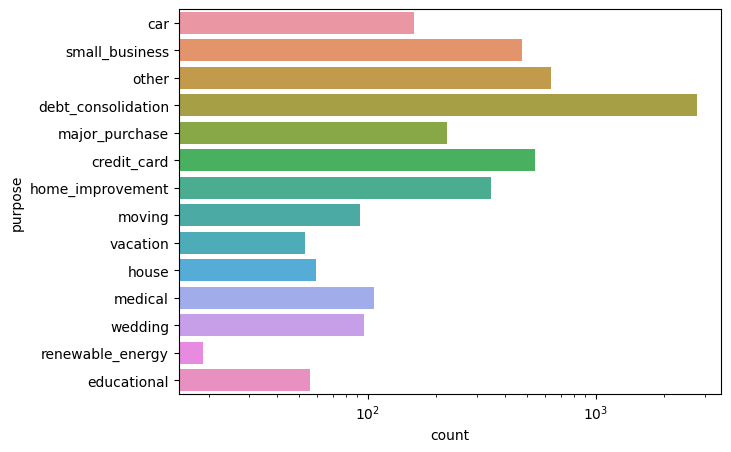

In [244]:
# --- Analyzing Purpose Column ---

obj_fig, ax = plt.subplots(figsize = (7,5))

# Setting x axis scale to log value so that graph can display data spread while not making any changes to the actual data
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=my_data[my_data.loan_status == 'Charged Off'])

###**Annual Income Column**: Analyzing this tells us that lower income groups are defaulting the most. Therefore, lower income goups should be charged higher interest rates to minimize credit loss.

<Axes: xlabel='annual_inc_new', ylabel='count'>

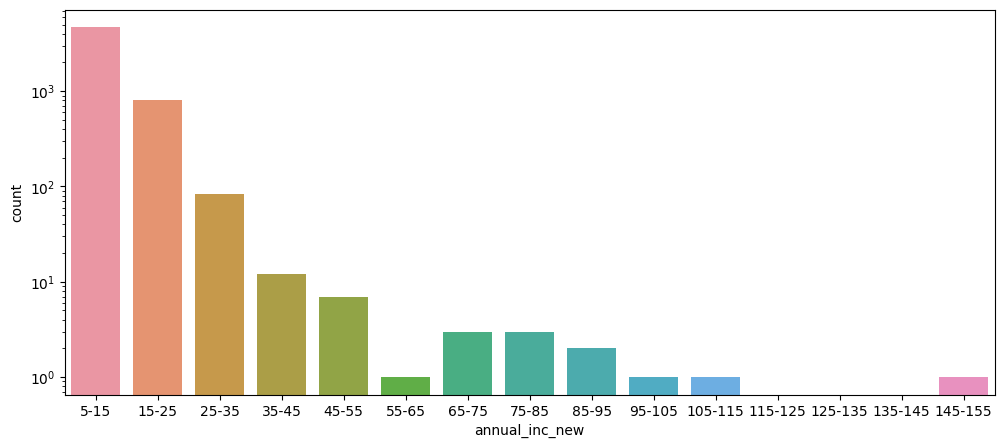

In [245]:
# --- Analyzing Annual Income ---

obj_fig, ax = plt.subplots(figsize = (12,5))
ax.set(yscale = 'log')
sns.countplot(x='annual_inc_new', data = my_data[my_data.loan_status == 'Charged Off'])

###**Loan Tenure Column**: This tells us that loans taken for longer duration are more likely to default.

###Hypothesis: It's highly likely that people are taking a longer tenure loan due to their low income and then default repaying it.

<Axes: xlabel='count', ylabel='term'>

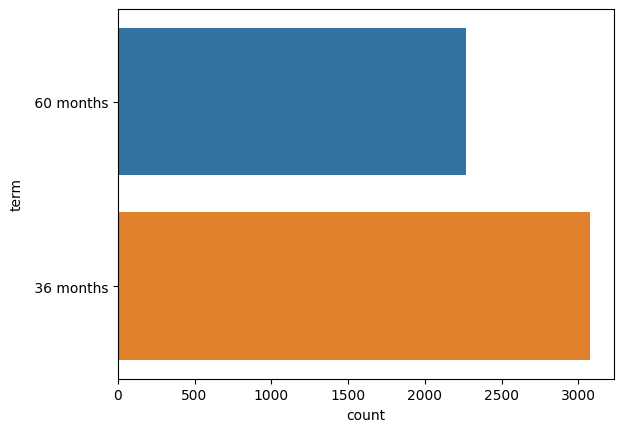

In [246]:
# --- Analyzing Loan Tenure Categories ---

sns.countplot(y='term', data=loan_data[loan_data['loan_status']=='Charged Off'])

###**Loan Amount Column**: Studying the spread of data to understand range of loan amount

<Axes: xlabel='loan_amnt', ylabel='Count'>

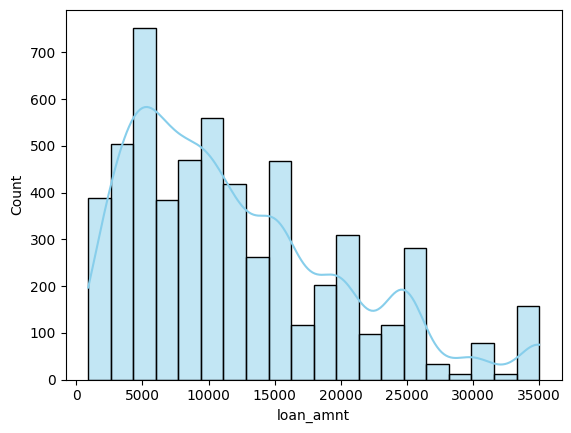

In [247]:
# ---- Analyzing Loan Amount ---

sns.histplot(my_data.loan_amnt, bins=20, kde=True, color='skyblue')

###**Verification Status Column**: This gives us an insight that most loan defaulters were actually not verified. Therefore, from now onwards, the lending club should make more strict policies and verification processes to ensure that only verified groups can get a loan sanctioned.

###Another possiblity for the large no. of unverified loan takers could be that **loan applicants are bribing** employees of the lending club to sanction the loan. The club should investigate this possiblity and implement more strict compliance policies if needed.

<Axes: xlabel='verification_status', ylabel='count'>

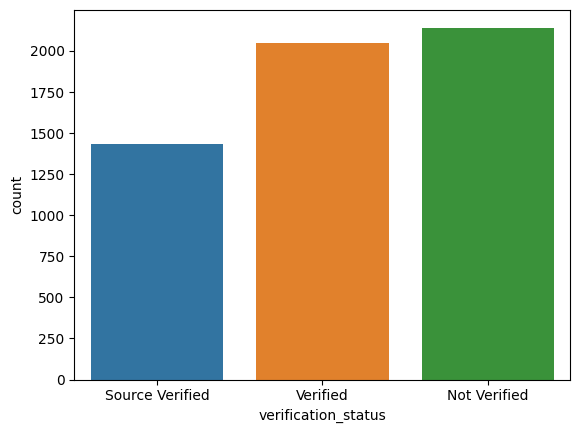

In [248]:
# --- Verification Status Column Analyzed below ---

sns.countplot(x = 'verification_status', data = my_data[my_data['loan_status']=='Charged Off'])

#**Bivariate Analysis**

###**Comparing dti based on address state**: This tells us that people from 'ID' spend above their means and are more likely to default.

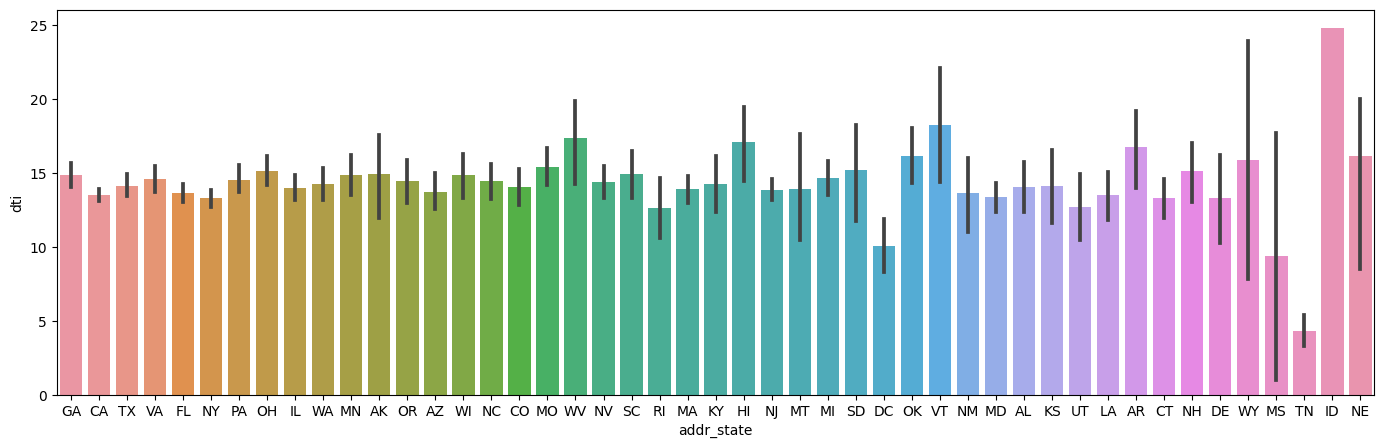

In [249]:
plt.figure(figsize=(17,5))
sns.barplot(data = my_data, x ='addr_state', y ='dti')
plt.show()

###**Comparing home ownership with purpose**

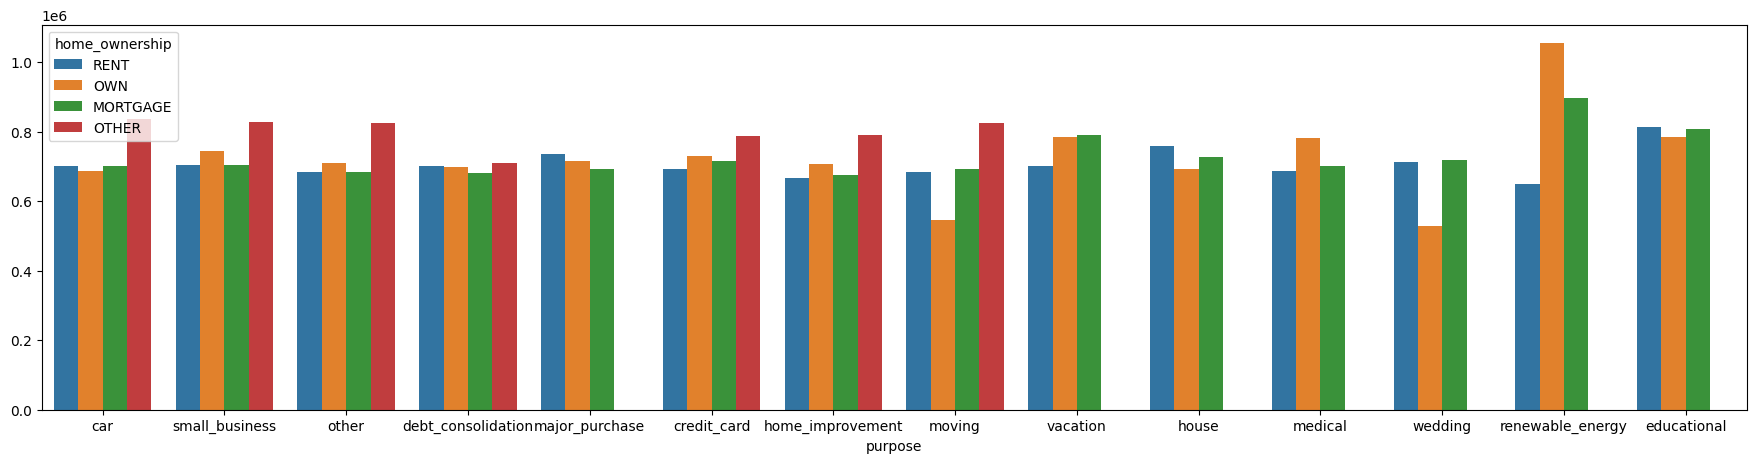

In [250]:
plt.figure(figsize=(22,5))
sns.barplot(data = my_data, x = 'purpose', y =my_data['id'].value_counts().index, hue='home_ownership', ci=None)
plt.show()

#**Comparing Loan Amount with Grade**

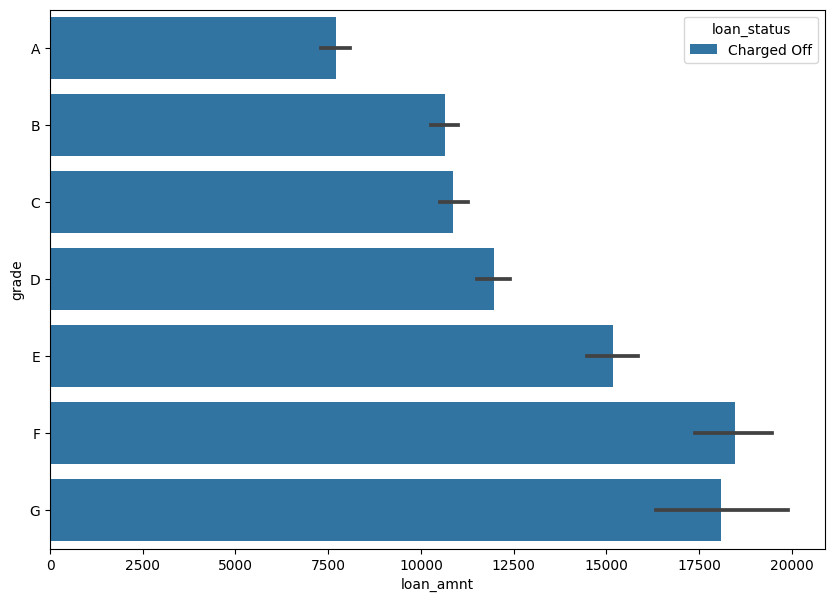

In [251]:
plt.figure(figsize=(10,7))
sns.barplot(data =loan_data,x='loan_amnt', y='grade', hue ='loan_status', order=['A','B','C','D','E','F','G'])
plt.show()

#**Comparing interest rate & annual income based on grade**

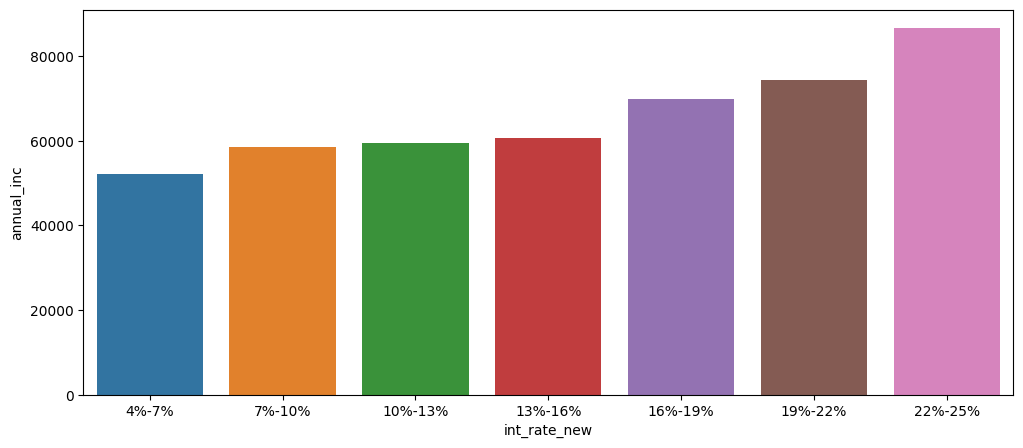

In [252]:
plt.figure(figsize=(12,5))
sns.barplot(data = my_data, x ='int_rate_new', y ='annual_inc', ci=None)
plt.show()

#**Observations**

###Below are some observations & **actionable insights** based on the analysis:
* Most loan defaulters have an income of less than 55,000. Therefore, more interest should be charged for higher income groups.
* Borrowers from the 'ID' state spend above their means and are more likely to default. There must be stricter criteria to grant them the loan.
* Most loans are defaulted by low-income groups. However, interest rates charged to them are the lowest. This is causing more crdit loss.
* Loans taken for Debt Consolidation are one of the highest.
* 'F' grade loans have the highest amount of loan defaulters. Set lower loan limits for 'F' grade loans. Restricting the loan amount reduces the potential loss in case of default.